# System Dynamics Models with Multiple Variables
This notebook develops systems dynamics models for models with two variables.  We develop these models using population simulations in which two species are competing for a common resource and for situations in which one species eats the other species (predator - pray models).

First, let us write down a general exponential growth differential equation for a two variable problem.  In the most general case, each species could influence the growth rate of itself and the other species.  With two species, we also have the possibility that the growth rate of a given species depends on the product of the population of each species.  Thus we have:
$$\frac{dP_0}{dt}=r_{0,0}P_0+r_{0,1}P_1-a_{0,0}P_0^2-a_{0,1}P_0P_1$$
and
$$\frac{dP_1}{dt}=r_{1,0}P_0+r_{1,1}P_1-a_{1,0}P_0P_1-a_{1,1}P_1^2.$$
Note that we can also write these two differential equations in somewhat of a matrix form as
$$\left[\begin{array}{c} \frac{dP_0}{dt} \\ \frac{dP_0}{dt} \end{array}\right] = \left[\begin{array}{cc} r_{0,0} & r_{0,1} \\ r_{1,0} & r_{1,1} \end{array} \right] \left[\begin{array}{c} P_0 \\ P_1 \end{array}\right]-\left[\begin{array}{c} a_{0,0}P_0^2-a_{0,1}P_0P_1 \\ a_{1,0}P_0P_1-a_{1,1}P_1^2 \end{array} \right]$$

In these equations, the $r$ terms give the growth rate.  This is the same term we used when we introduced unconstrained growth, $\frac{dP}{dt}=rP$.  The off-diagonal $r$ terms account for the influence of one species on the other species.  The $a$ terms account for competition.  The $a_{0,0}$ term is the same as we had in constrained growth, $\frac{dP}{dt}=rP - a_{0,0}P$ in which $a_{0,0}=r\frac{P}{M}$.  Similarly, the $a_{0,1}$ accounts for how much species 0 competes with species 1 for its resources.  These terms could also account for predator/prey interaction in which one species eats the other.  The above equations are generic, and we can modify the terms for specific interaction examples.  We do this in the following sections.

It is also worth pointing out that these equations involve multiple variables and are non-linear.  These equations are not solvable with analytic methods except for a few special cases.  Without being able to develop analytic solutions, numerical solution techniques are more important.

Before we begin, a word of caution is in order.  A model is only as accurate as the inputs into the model.  These models include things such as growth rate or carrying capacity.  These quantities will not be known for real-world situations.  Also, the models presented here include a limited number of terms.  For instance, things such as variation through time or more complex food web interactions are not included in these models.  Therefore, we should not expect these simple models to be an exact representation of real world population growth.  With these precautions, let us begin our study.

## Two Species Competing for Same Resource
Following the example in module 4.1 of Angela B. and George W Shiflet's book, [Introduction to Computational Science](https://ics.wofford-ecs.org/), we will model two species competing for the same resource.  As in the book, we will use black-tip sharks and white-tip sharks.  [Gary White](http://warnercnr.colostate.edu/~gwhite/) discusses competition among multiple species in his [course lecture notes](http://warnercnr.colostate.edu/~gwhite/fw662/web_docs/Lecture%2011%20Competition.pdf).  Those notes bring up the issue of the [competitive exclusion principle](https://en.wikipedia.org/wiki/Competitive_exclusion_principle) which states that two species competing for the same resources will not both continue to exist.  One species will either die off or specialize to use a slightly different resource or niche in the ecosystem.  Let us see what our model predicts.  First, we must import some modules.

In [1]:
#This code performs the necessary steps to prepare for plotting.
from matplotlib import pyplot
from math import *
    
#Set the default plot to be inline rather than a new window.
%matplotlib inline

import inspect  #This allows us to print the source code in this notebook.
from SD_Interactions_Examples import *  #Import the custom functions from this project.

Our code implements the full generic set of coupled differential equations given above.  We will modify the coefficients passed to model different types of interactions.  The code is below.

In [2]:
print(inspect.getsource(two_pop_model))

def two_pop_model(dt, timemax, r, a, pp, T_Interval = 1.0):
    """Model for two species population growth with interaction.
    Parameters:
        dt - Timestep
        timemax - time to which the simulation will run
        r - 2 x 2 list of coeficients which are multiplied by the population
            terms to determine growth rate.
        a - 2 x 2 list of coeficients which are multiplied by the population squared
            terms to determine growth rate.
        pp - 2 x 1 list of initial populatino values.
        T_Interval - (Optional Keyword argument).  Time between data being returned.
          if not given, defaults to 1.
    Returns:
        Touple of time and population values: (t[n], [p[0],p[1]][n])
    """

    #set initial values
    p = [pp[0],pp[1]]
    t = 0
    t_array = [0]
    population_array = [[p[0],p[1]]]

    while t < timemax:
        #Store current population values so all calculations are based on values from
        #  previous time step.
        pt

### No Species Interaction
Let us test our code with a simple example.  Let us take all of the cross species interaction terms to zero.  We then have two differential equations which do not depend on each other at all.  They are exactly identical to the constrained growth problem we investigated earlier.
$$\frac{dP_0}{dt}=r_{0,0}P_0+-a_{0,0}P_0^2$$
and
$$\frac{dP_1}{dt}+r_{1,1}P_1-a_{1,1}P_1^2.$$
in which $a=\frac rM$ with $M$ being the carrying capacity.

Let us run the simulation with two different carrying capacities.

In [3]:
#Define the constants
M=(100,80); r=((1,0),(0,1));
a=((r[0][0]/M[0], 0.0),(0.0, r[1][1]/M[1]))

#Define timestep size and run simulation.
dt=.001; timemax = 10; pp=(10,10)
ts0, pops = two_pop_model(dt, timemax, r, a, pp)

#Unpack results into indvidual arrays.
p0s0 = [p[0] for p in pops];
p1s0 = [p[1] for p in pops];

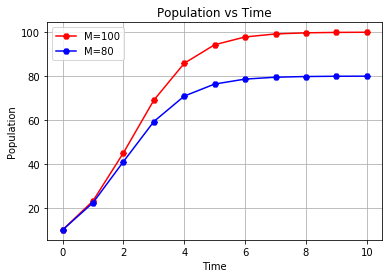

In [4]:
S0Figure, S0Axes = pyplot.subplots(1, 1);
S0Axes.plot(ts0, p0s0, 'r-H',label='M='+str(M[0]));
S0Axes.plot(ts0, p1s0, 'b-H',label='M='+str(M[1]));
S0Axes.set_xlabel('Time');
S0Axes.set_ylabel('Population');
S0Axes.set_title('Population vs Time');
S0Axes.legend()
S0Axes.grid()

The plot above gives us confidence that our simulation code is correct.  While much of the code is still untested, the code does seem to correctly simulate two constrained growth problems. 

## Text Example for Whitetip and Blacktip Sharks
The text uses an example of whitetip and blacktip sharks competing for common resources.  The parameters defined in the text are:

In [5]:
r=((1,0),(0,1))
a=((0, 0.20),(0.27, 0))
pp=(15,20)

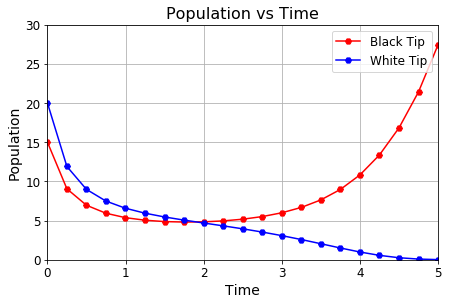

In [6]:
ts1, pops = two_pop_model(dt, timemax, r, a, pp, T_Interval=0.25)
p0s1 = [p[0] for p in pops]
p1s1 = [p[1] for p in pops]
left=0; right=5;top=30;bottom=0;
S1Figure, S1Axes = pyplot.subplots(1, 1);
S1Axes.plot(ts1, p0s1, 'r-H',label='Black Tip');
S1Axes.plot(ts1, p1s1, 'b-H',label='White Tip');
S1Axes.set_xlabel('Time');
S1Axes.set_ylabel('Population');
S1Axes.set_title('Population vs Time');
S1Axes.set_xlim(left,right);S1Axes.set_ylim(bottom,top);
format_plot(S1Axes,12)

Note that this model's end result is that one species survives while the other dies.  This is the prediction of the [competitive exclusion principle](https://en.wikipedia.org/wiki/Competitive_exclusion_principle).  In the parameters of this model, the Black Tip Sharks are slightly more efficient.  Therefore, their death rate is slightly less and they out compete the whitetip Sharks.  Note that a better model would include a carrying capacity for each species individually as well.  The simulation below includes this.  Note that in the simulation below there is not an exponential growth but rather logistic or constrained growth.

In [7]:
r=((1,0),(0,1))
a=((0.20, 0.20),(0.27, 0.27))
pp=(15,20)

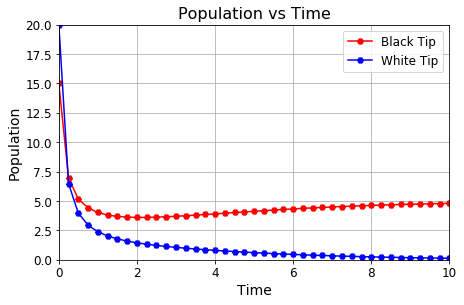

In [8]:
tmax=50
ts2, pops = two_pop_model(dt, tmax, r, a, pp, T_Interval=0.25)
p0s2 = [p[0] for p in pops]
p1s2 = [p[1] for p in pops]
left=0; right=10;top=20;bottom=0;
S2Figure, S2Axes = pyplot.subplots(1, 1);
S2Axes.plot(ts2, p0s2, 'r-H',label='Black Tip');
S2Axes.plot(ts2, p1s2, 'b-H',label='White Tip');
S2Axes.set_xlabel('Time');
S2Axes.set_ylabel('Population');
S2Axes.set_title('Population vs Time');
S2Axes.set_xlim(left,right);S2Axes.set_ylim(bottom,top);
format_plot(S2Axes,12)

Also, note that the populations were initially above the carrying capacity.  The term $-r \frac{P}{M} P$ is a restoring term.  It brings the population back to the Carrying capacity, $M$.

## Predator - Prey Models
Next, let us consider predator - pray models.  In this case, the prey population increases, but the prey are eaten by the predators.  We will assume that the rate of prey being eaten is proportional to population of the predators and prey.  With more predators, there are more mouths to feed, and with more prey it is easier for the predators to eat.  These assumptions give the classic [Lotka–Volterra_equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations).
$$\frac{dP_0}{dt}=r_{0,0}P_0-a_{0,1}P_0P_1$$
and
$$\frac{dP_1}{dt}=r_{1,1}P_1-a_{1,0}P_0P_1.$$
In the Lotka-Volterra model and the equations above, $a_{1,0}<0$ as more interactions between the predator and prey help the predators grow.  Also, $r_{1,1}<0$ as the prey population will die off if there is no prey around to feed them.

[Gary White](http://warnercnr.colostate.edu/~gwhite/) from Colorado State has a [good discussion](http://warnercnr.colostate.edu/~gwhite/fw662/web_docs/Lecture%2010%20Predation.pdf) of predator - prey models and their use in ecology.  

### Book Example
The example given in Module 4.2 of Introduction to Computational Science is below.

In [9]:
dt=0.00015; timemax = 24
r=([2,0],[0,-1.06])
a=((0,0.02),(-0.01, 0))
pp=(100,15)
ts3, pops = two_pop_model(dt, timemax, r, a, pp, 0.025)
p0s3 = [p[0] for p in pops]
p1s3 = [p[1] for p in pops]

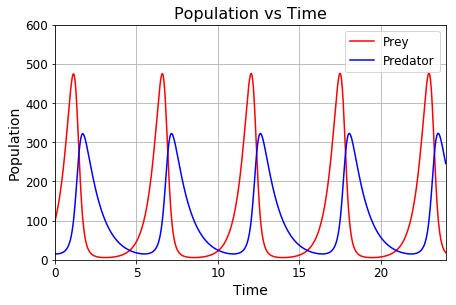

In [10]:
left=0; right=24;top=600;bottom=0;
S3Figure, S3Axes = pyplot.subplots(1, 1);
S3Axes.plot(ts3, p0s3, 'r-',label='Prey');
S3Axes.plot(ts3, p1s3, 'b-',label='Predator');
S3Axes.set_xlabel('Time');
S3Axes.set_ylabel('Population');
S3Axes.set_title('Population vs Time');
S3Axes.set_xlim(left,right);S3Axes.set_ylim(bottom,top);
format_plot(S3Axes,12)

In this model, the predator and prey values return to the exact same value.  This model give periodic (or cyclic) behavior.  In the plot below, let us focus on one complete cycle.

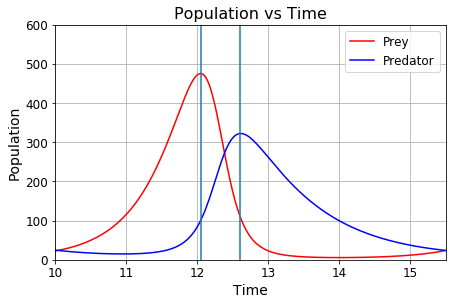

In [11]:
left=10; right=15.5;
S3Axes.set_xlim(left,right);
S3Axes.axvline(12.05);S3Axes.axvline(12.6)
S3Figure

We can also plot the predators vs the prey.  In this case, the number of predators and prey returns to the exact starting condition.  This does require a somewhat small $\Delta t$ to get good accuracy.  This plot is called a phase space plot and is below.

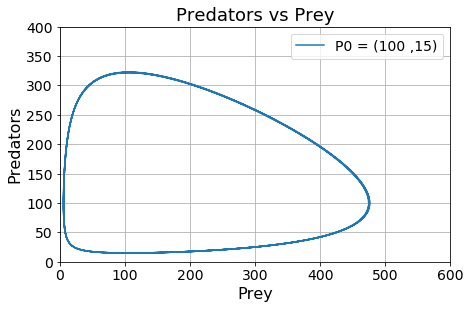

In [12]:
left=0; right=600;top=400;bottom=0;
S3AFigure, S3AAxes = pyplot.subplots(1, 1);
S3AAxes.plot(p0s3, p1s3, '-',label='P0 = ('+str(pp[0])+' ,'+str(pp[1])+')');
S3AAxes.set_xlabel('Prey');
S3AAxes.set_ylabel('Predators');
S3AAxes.set_title('Predators vs Prey');
S3AAxes.set_xlim(left,right);S3AAxes.set_ylim(bottom,top);
format_plot(S3AAxes,14)

Let us make this same plot, but include different initial conditions on the plot.

In [13]:
pp=(175,195)
ts3e, pops = two_pop_model(dt, timemax, r, a, pp,T_Interval=.025)
p0s3e = [p[0] for p in pops]
p1s3e = [p[1] for p in pops]
S3AAxes.plot(p0s3e, p1s3e, '-',label='P0 = ('+str(pp[0])+' ,'+str(pp[1])+')');

pp=(150,135)
ts3d, pops = two_pop_model(dt, timemax, r, a, pp,T_Interval=.025)
p0s3d = [p[0] for p in pops]
p1s3d = [p[1] for p in pops]
S3AAxes.plot(p0s3d, p1s3d, '-',label='P0 = ('+str(pp[0])+' ,'+str(pp[1])+')');

pp=(125,75)
ts3c, pops = two_pop_model(dt, timemax, r, a, pp,T_Interval=.025)
p0s3c = [p[0] for p in pops]
p1s3c = [p[1] for p in pops]
S3AAxes.plot(p0s3c, p1s3c, '-',label='P0 = ('+str(pp[0])+' ,'+str(pp[1])+')');

pp=(100,106)
ts3b, pops = two_pop_model(dt, timemax, r, a, pp,T_Interval=.025)
p0s3b = [p[0] for p in pops]
p1s3b = [p[1] for p in pops]
S3AAxes.plot(p0s3b, p1s3b, '-',label='P0 = ('+str(pp[0])+' ,'+str(pp[1])+')');

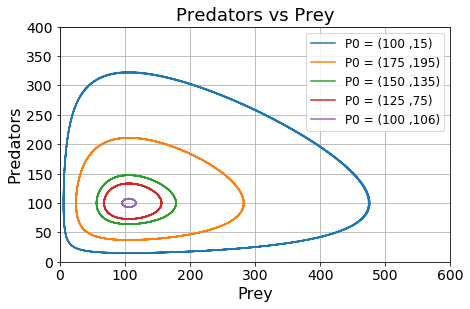

In [14]:
S3AAxes.legend(fontsize=12);
S3AFigure

## Search for Chaos
With two differential equations, this system gives periodic behavior.  The number of species returns to the exact same value as the initial conditions.  In the phase space plot, this means the plot retraces produces a single line as the plot retraces the same values with each cycle.  If we introduce a third differential equation, we can get something very different.

We change the simulation code to allow for an arbitrary number of species and equations.  That code is below. 

In [15]:
print(inspect.getsource(pop_model))

def pop_model(dt, timemax, r, a, pp, T_Interval = 1):
        """Model for an N species population model.
        The parameters are the same as two_pop_model"""

        N=len(pp)
        p = [pp[j] for j in range(N)]
        t = 0
        t_array = [0]
        population_array = [p[:]]

        while t < timemax:
            ptn1 = p[:]
            for j in range(N):
                delta = sum([r[j][k] * ptn1[k]           for k in range(N)])
                delta -= sum([a[j][k] * ptn1[j] * ptn1[k] for k in range(N)])
                p[j] += delta * dt
            t += dt
            if abs(t % T_Interval) < dt:
                t_array.append(t)
                population_array.append(p[:])

        return t_array, population_array



In [this paper](http://sprott.physics.wisc.edu/chaos/lvmodel/chaos.pdf) [J.C. Sprott](http://sprott.physics.wisc.edu/) describes that certain combinations of coefficients do give chaotic solutions for the Lotka-Volterra model.  The coefficients below come from their paper.  Our $a$ matrix is their $r$ values times their $a$ values, that is $a_{ours}=r_{Theirs}\:a_{Theirs}.$

In [16]:
import numpy as np             #Used to print the matrices pretty.
tempr=[1, 0.72, 1.53, 1.27]
cr=[[tempr[i] if i==j else 0 for i in range(4)] for j in range(4)]
ca=[                   [1,   1.09,  1.52, 0],
    [cr[1][1]*el for el in [0,   1,     0.44, 1.36]],
    [cr[2][2]*el for el in [2.33, 0,    1,    0.47]],
    [cr[3][3]*el for el in [1.21, 0.51, 0.35, 1]]]

In [17]:
print(np.matrix(cr))

[[ 1.    0.    0.    0.  ]
 [ 0.    0.72  0.    0.  ]
 [ 0.    0.    1.53  0.  ]
 [ 0.    0.    0.    1.27]]


In [18]:
print(np.matrix(ca))

[[ 1.      1.09    1.52    0.    ]
 [ 0.      0.72    0.3168  0.9792]
 [ 3.5649  0.      1.53    0.7191]
 [ 1.5367  0.6477  0.4445  1.27  ]]


In [19]:
dt=0.0005
timemax = 1000
pp=(.5,.5, .75, .25)
tc, pops = pop_model(dt, timemax, cr, ca, pp, T_Interval=0.25)
pc0 = [p[0] for p in pops]
pc1 = [p[1] for p in pops]
pc2 = [p[2] for p in pops]
pc3 = [p[3] for p in pops]

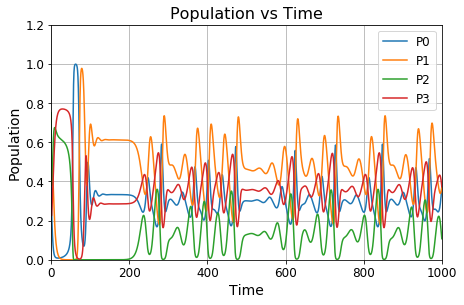

In [20]:
left=0; right=1000;top=1.2;bottom=0;
CFigure, CAxes = pyplot.subplots(1, 1);
CAxes.plot(tc, pc0, '-', label = 'P0')
CAxes.plot(tc, pc1, '-', label = 'P1')
CAxes.plot(tc, pc2, '-', label = 'P2')
CAxes.plot(tc, pc3, '-', label = 'P3')
CAxes.set_xlabel('Time');
CAxes.set_ylabel('Population');
CAxes.set_title('Population vs Time');
CAxes.set_xlim(left,right);CAxes.set_ylim(bottom,top);
format_plot(CAxes,12)

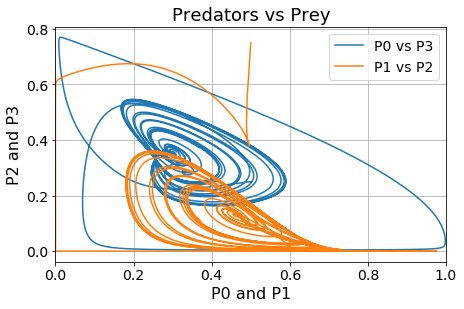

In [21]:
left=0; right=1;top=1;bottom=0;
CPSFigure, CPSAxes = pyplot.subplots(1, 1);
CPSAxes.plot(pc0, pc3, '-',label='P0 vs P3');
CPSAxes.plot(pc1, pc2, '-',label='P1 vs P2');
#CPSAxes.plot(pc0, pc2, '-',label='P0 vs P2');
#CPSAxes.plot(pc0, pc3, '-',label='P0 vs P3');
CPSAxes.set_xlabel('P0 and P1');
CPSAxes.set_ylabel('P2 and P3');
CPSAxes.set_title('Predators vs Prey');
CPSAxes.set_xlim(left,right);CAxes.set_ylim(bottom,top);
format_plot(CPSAxes,14)

In this chaotic system, the plots of the population values do not show cyclic behavior.  The values for all four variables do not return to a value.  In the phase space plot, this results in the curves not retracing their steps.  Note that there are time regions such that the population values are somewhat stable or constant, but the system does break out of this behavior.